In [ ]:
!apt install tesseract-ocr   # install Tesseract OCR engine and its language data files
!pip install pytesseract  # install the pytesseract package.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pytesseract 
from google.colab.patches import cv2_imshow   # to show the images

In [ ]:
# Load the image
image = cv2.imread("/content/20180402113123_NumberPlate_Swift.jpg")

# Clean the image using thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Find the contour with the largest area (assumed to be the number plate)
max_area = 0
best_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        best_contour = contour

# Extract the bounding box of the number plate
x, y, w, h = cv2.boundingRect(best_contour)
plate = image[y:y+h, x:x+w]

In [ ]:
blurred = cv2.GaussianBlur(plate, (5, 5), 0)

In [ ]:
gray_plate = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

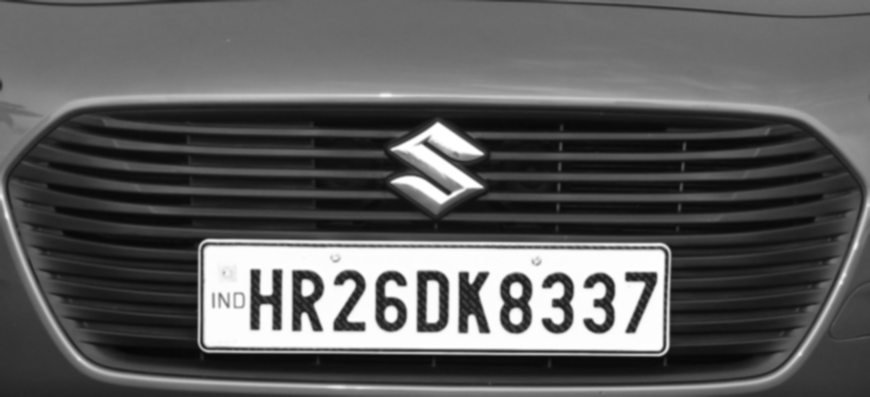

In [ ]:
cv2_imshow(gray_plate)

In [ ]:
_, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

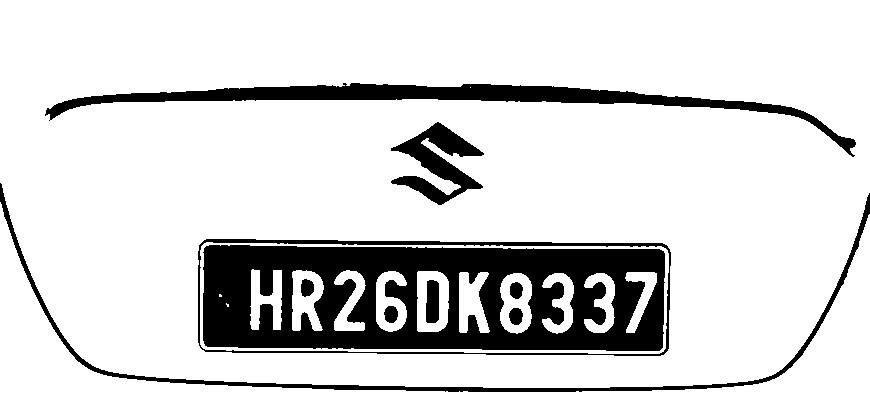

In [ ]:
cv2_imshow(thresh_plate)

In [ ]:
# Apply OCR on the thresholded image
text = pytesseract.image_to_string(thresh_plate)

In [ ]:
template = cv2.imread("/content/20180402113123_NumberPlate_Swift.jpg", 0)

In [ ]:
result = cv2.matchTemplate(gray_plate, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
if np.max(result) > threshold:

    print("The font matches")
else:
    print("The font does not match")


The font matches
